<a href="https://colab.research.google.com/github/Reyhan-Code/Clasification-Cat-Dog-With-CNN/blob/main/Image_Classification_With_CNN_Cat%26Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import TensorFlow

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os

# Download Dataset

In [8]:
!gdown 1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD

Downloading...
From (original): https://drive.google.com/uc?id=1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD
From (redirected): https://drive.google.com/uc?id=1oU7nFsLirpuEiVIjL4IJs7hsqzE4i9TD&confirm=t&uuid=35b97c01-c61c-42fd-8c5e-81db1efc1998
To: /content/archive.zip
100% 228M/228M [00:10<00:00, 22.3MB/s]


In [10]:
! unzip "/content/archive.zip"

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg 

In [13]:
base_dir = '/content/dog vs cat/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')

In [14]:
os.listdir(train_dir)

['dogs', 'cats']

In [15]:
os.listdir(test_dir)

['dogs', 'cats']

# Augmentasi gambar

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=400,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Membangun Model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
history = model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/5
20/20 [==============================] - 142s 6s/step - loss: 1.0167 - accuracy: 0.5210 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 121s 6s/step - loss: 0.6842 - accuracy: 0.5560 - val_loss: 0.6549 - val_accuracy: 0.6360
Epoch 3/5
20/20 [==============================] - 121s 6s/step - loss: 0.6330 - accuracy: 0.6373 - val_loss: 0.6193 - val_accuracy: 0.6500
Epoch 4/5
20/20 [==============================] - 117s 6s/step - loss: 0.5833 - accuracy: 0.6941 - val_loss: 0.5514 - val_accuracy: 0.7260
Epoch 5/5
20/20 [==============================] - 116s 6s/step - loss: 0.5551 - accuracy: 0.7164 - val_loss: 0.5546 - val_accuracy: 0.7215


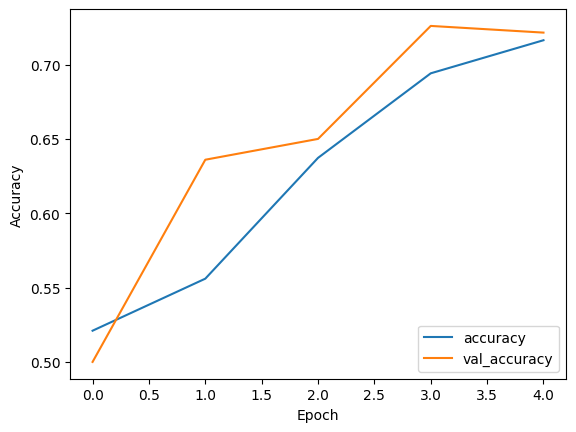

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Transfer Learning

In [23]:
from keras.applications import Xception

In [24]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [26]:
model = tf.keras.models.Sequential([
    base_model,

    layers.Flatten(),

    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46552105 (177.58 MB)
Trainable params: 25690625 (98.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [27]:
optimizer = optimizers.Adam()

In [28]:
model.compile(optimizer=optimizer,
             loss="binary_crossentropy",
              metrics=['accuracy']
             )

In [29]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
20/20 [==============================] - 163s 6s/step - loss: 1.0701 - accuracy: 0.9409 - val_loss: 0.3032 - val_accuracy: 0.9840
Epoch 2/5
20/20 [==============================] - 134s 7s/step - loss: 0.2644 - accuracy: 0.9810 - val_loss: 0.1178 - val_accuracy: 0.9845
Epoch 3/5
20/20 [==============================] - 134s 7s/step - loss: 0.0672 - accuracy: 0.9833 - val_loss: 0.0575 - val_accuracy: 0.9885
Epoch 4/5
20/20 [==============================] - 134s 7s/step - loss: 0.0391 - accuracy: 0.9866 - val_loss: 0.0553 - val_accuracy: 0.9910
Epoch 5/5
20/20 [==============================] - 134s 7s/step - loss: 0.0358 - accuracy: 0.9856 - val_loss: 0.0542 - val_accuracy: 0.9895


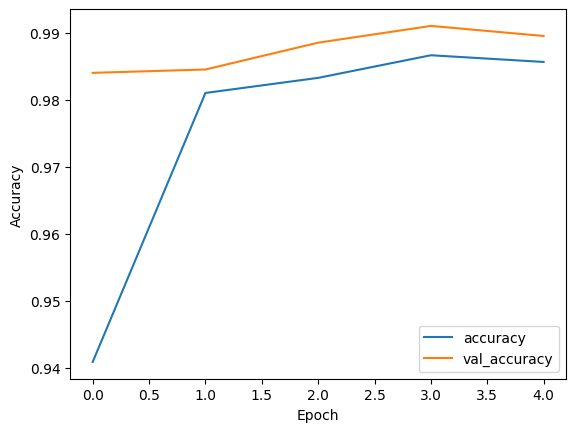

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [31]:
loss, accuracy = model.evaluate( validation_generator)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')

5/5 [==============================] - 10s 2s/step - loss: 0.0542 - accuracy: 0.9895
Loss: 0.0542
Accuracy: 98.95%


In [33]:
model.save("CatDogsV2.h5")

In [34]:

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Ubah ukuran gambar menjadi 224x224
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print(f"The image at {img_path} is predicted to be a dog with probability {prediction[0][0]}")
    else:
        print(f"The image at {img_path} is predicted to be a cat with probability {1 - prediction[0][0]}")

# Path ke model Keras
model_path = '/content/CatDogsV2.h5'

# Periksa apakah file model ada
if os.path.exists(model_path):
    # Muat model Keras
    model = load_model(model_path)

    # Contoh penggunaan
    test_image_path = '/content/test/puppy-mills-1_11.jpeg'
    predict_image(model, test_image_path)
else:
    print(f"File tidak ditemukan: {model_path}")

1/1 [==============================] - 1s 834ms/step
The image at /content/test/puppy-mills-1_11.jpeg is predicted to be a dog with probability 0.9999744892120361


1/1 [==============================] - 0s 24ms/step


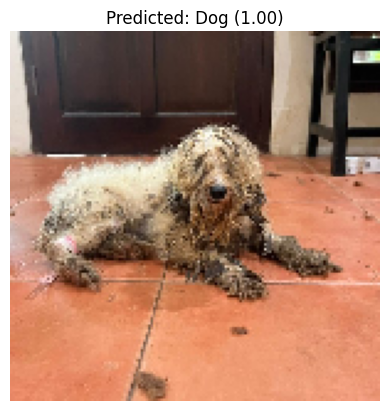

In [35]:
import matplotlib.pyplot as plt

def visualize_prediction(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    img = image.load_img(img_path, target_size=(150, 150))

    plt.imshow(img)
    plt.axis('off')
    if prediction[0] > 0.5:
        plt.title(f"Predicted: Dog ({prediction[0][0]:.2f})")
    else:
        plt.title(f"Predicted: Cat ({1 - prediction[0][0]:.2f})")
    plt.show()

# Contoh penggunaan
test_image_path = '/content/test/puppy-mills-1_11.jpeg'
visualize_prediction(model, test_image_path)